In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.compat.v1.enable_eager_execution()

In [3]:
# 데이터 로드
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

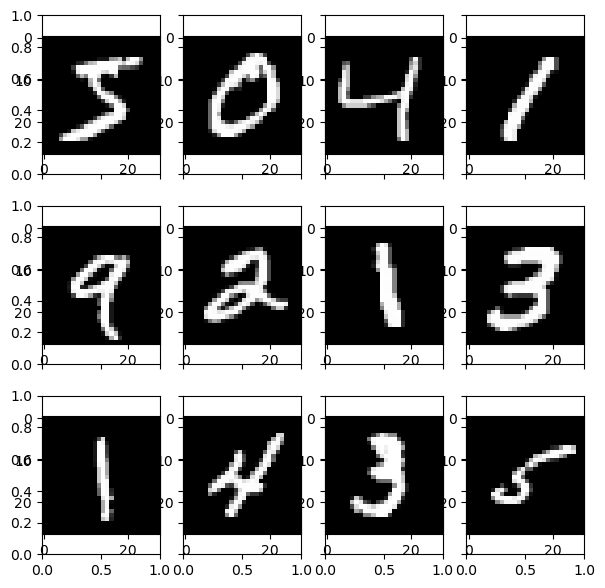

In [4]:
# 데이터 시각화
f, axes = plt.subplots(3, 4, figsize=(7, 7), sharex=True, sharey=True)
for i in range(12):
    ax = f.add_subplot(3, 4, i + 1)
    ax.imshow(train_images[i], cmap='Greys_r')
plt.show()

In [5]:
# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(20, (5, 5), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(50, (5, 5), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
import tensorflow as tf
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager execution: True


In [7]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=10, batch_size=100, validation_split=0.1)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# 훈련 데이터 및 테스트 데이터의 오분류율
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Misclassification error (train):', 1 - train_acc)
print('Misclassification error (test):', 1 - test_acc)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9133 - loss: 0.2789 - val_accuracy: 0.9827 - val_loss: 0.0660
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9885 - loss: 0.0376 - val_accuracy: 0.9880 - val_loss: 0.0391
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9925 - loss: 0.0227 - val_accuracy: 0.9860 - val_loss: 0.0468
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9903 - val_loss: 0.0305
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9962 - loss: 0.0109 - val_accuracy: 0.9882 - val_loss: 0.0464
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 0.9865 - val_loss: 0.0510
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9962 - loss: 0.0103 - val_accuracy: 0.9882 - val_loss: 0.0508
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9972 - loss: 0.0080 - val